# Introduction
Gradient descent is likened to going down a mountain or valley. You will learn the gradient descent method by creating a descent program from Mt. Fuji, as if it were an objective function that you want to minimize.

In [5]:
#predefines and import
import numpy as np
import matplotlib.pyplot as plt

csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)


## In order from the left, "the number of that point", "latitude", "longitude", "elevation", and "distance from point 0". The units of altitude and distance are meters. Data for 300 locations.

In [6]:
print(fuji)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


# Problem 1
## Visualization

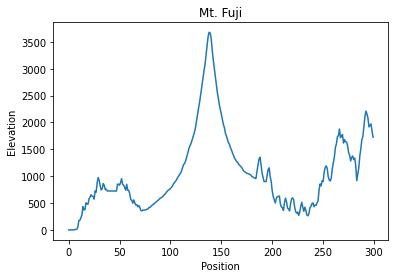

In [7]:
def problem1():
    plt.plot(fuji[:,0], fuji[:, 3])
    plt.title('Mt. Fuji')
    plt.xlabel('Position')
    plt.ylabel('Elevation')
    plt.show()
problem1()

# Problem 2
## Slople Calculaion

In [18]:
def slope(position, data_set):
    difference = data_set[position] - data_set[position-1]
    # print('point:', data_set[position])
    # print('prev:', data_set[position-1])
    # print('diff', difference,'diff3',difference[3])
    slope = difference[3]/difference[0]
    return slope
def problem2():
    position = 138
    print(f'Slope of the position {position} on Fuji is: {slope(position,fuji)}')
    position = 139
    print(f'Slope of the position {position} on Fuji is: {slope(position,fuji)}')
problem2()

Slope of the position 138 on Fuji is: 79.88000000000011
Slope of the position 139 on Fuji is: -15.059999999999945


# Problem 3
## Destination Function

In [26]:
def destination(current_location, alpha, data_set):
    destination = np.floor(current_location - alpha * slope(current_location,data_set))
    if destination <=0: return 0
    if destination >= data_set.shape[0]: return data_set.shape[0]
    return int(destination)
def problem3():
    alpha = 0.2
    p1 = 138
    p2 = 139
    p3 = 140
    print(f'destination if started from position {p1} is position {destination(p1,alpha,fuji)}')
    print(f'destination if started from position {p2} is position {destination(p2,alpha,fuji)}')
    print(f'destination if started from position {p3} is position {destination(p3,alpha,fuji)}')
    print(f'destination if started from near bottom: {10} is position {destination(10,alpha,fuji)}')
    print(f'destination if started from near bottom {299} is position {destination(299,alpha,fuji)}')
problem3()

destination if started from position 138 is position 122
destination if started from position 139 is position 142
destination if started from position 140 is position 159
destination if started from near bottom: 10 is position 0
destination if started from near bottom 299 is position 300


# Problem 4
## Function to decend

In [43]:
def get_direction(new_position, old_position):
    """
    Return 0 if same +1 if new is larger and -1 if new is smaller
    """
    return 0 if new_position == old_position else (1 if new_position > old_position else -1)
def decend(init_position, moutain, alpha = 0.2):
    """
    Perform gradient decent, plus alpha tweaking when decend direction is changed.
    """
    #generate init postion, first positon and init direction
    position_list = [init_position]
    next_position = destination(init_position,alpha,moutain)
    direction = get_direction(next_position,init_position)
    if direction == 0: 
        return position_list
    else: 
        position_list.append(next_position)
    
    #gradient decent, i think
    while(True):
        position = position_list[-1]
        next_position = destination(position,alpha,moutain)
        new_direction = get_direction(next_position,position)
        if new_direction == 0:
            break
        elif new_direction != direction: # when direction change, lowers alpha to ease in on the minimum value.
            alpha = max(alpha - 0.001, 0.01) # i assume min aplha to be 0.01
            direction = new_direction
        else:
            position_list.append(next_position)
    return position_list
def problem4():
    init_position = 136
    print(f'Desend position list: {decend(init_position,fuji,alpha = 0.2)}')
problem4()

Desend position list: [136, 102, 97, 91, 88, 84, 80, 79, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 78, 77, 75, 74, 73, 70, 77, 75, 74, 73, 70, 77, 75, 74, 73, 70, 77, 75, 74, 73, 70, 77, 75, 74, 73, 70, 77, 75, 74, 73, 70, 77, 75, 74, 73, 70, 77, 75, 74, 73, 70, 77, 75, 74, 73, 70, 77, 75, 74, 73, 70, 77, 75, 74, 73, 70, 77, 75, 74, 73, 70, 77, 75, 74, 73, 70, 76, 74, 73, 70, 76, 74, 73, 70, 76, 74, 73, 70, 76, 74, 73, 70, 76, 74, 73, 70, 76, 75, 74, 73, 70, 76, 75, 74, 73, 70, 76, 75, 74, 73, 71, 78, 77, 75, 74, 73, 71, 78, 77, 75, 74, 73, 71, 78, 77, 75, 74, 73, 71, 78, 77, 75, 74, 73, 71, 78, 77, 75, 74, 73, 71, 77, 75, 74, 73, 71, 77, 75, 74, 73, 71, 77, 75, 74, 73, 71, 77, 75, 74, 73, 71, 77, 75, 74, 73, 71, 77, 75, 74, 73, 71, 77, 75, 74, 73, 71, 77, 75, 74, 73, 71, 77, 75, 74, 73, 71, 77, 75, 74, 73, 71, 76, 75, 74, 73, 71, 76, 75, 74, 73, 71, 76, 75, 74, 73, 71, 76, 75, 74, 73, 71, 76, 75, 74, 73, 71, 76, 75, 74, 73,

# Problem 5
## Visualize Decend

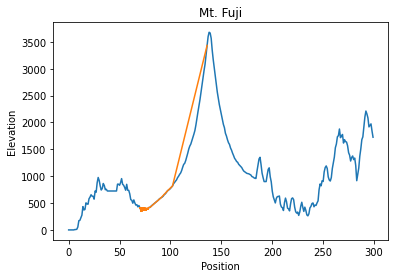

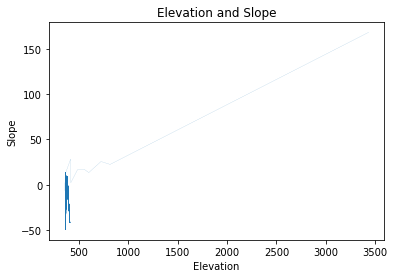

In [60]:
def problem5(init_position = 136,alpha = 0.2):
    decend_list = decend(init_position,fuji,alpha = alpha)
    decend_elevation = np.array([fuji[pos,3] for pos in decend_list])
    decend_slope = np.array([slope(pos,fuji) for pos in decend_list])
    plt.plot(fuji[:,0], fuji[:, 3])
    plt.plot(decend_list,decend_elevation)
    plt.title('Mt. Fuji')
    plt.xlabel('Position')
    plt.ylabel('Elevation')
    plt.show()

    plt.title('Elevation and Slope')
    plt.xlabel('Elevation')
    plt.ylabel('Slope')
    plt.plot(decend_elevation, decend_slope,linewidth = 0.1)
    plt.show()
problem5()

# Problem 6
## Change Init Value

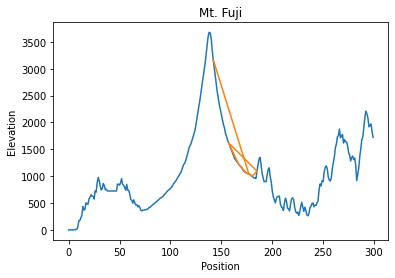

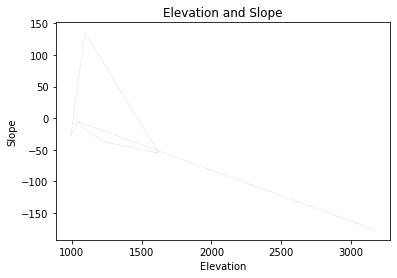

In [61]:
def problem6():
    problem5(init_position=142)
problem6() 

# Problem 7
## Change Hyper Parameter

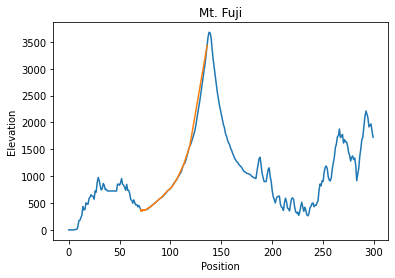

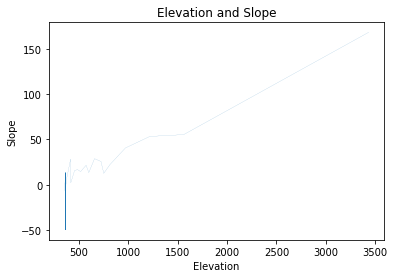

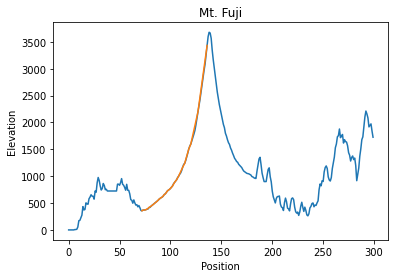

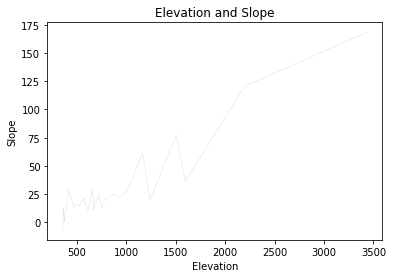

In [63]:
def problem7():
    problem5(alpha=0.1)
    problem5(alpha=0.05)
problem7()

### Note: problem 4,5,6,7:
- It can be seen that as we decrease alpha, the decend process is smoother and actually stop. But it take more ilterations to get to where we need.
- If we decend with a big alpha and does not decrease alpha, the decending process will jump back and forth between two sides of the minima and never stop.
- Bigger alpha can help us jump gaps as well, but i'm not sure if this is a good use of alpha.